In [4]:
# Episode 7 of the 5-min machine learning
# Written by S.L. July 2020
# Reference: https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py

print(__doc__)

from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import fetch_california_housing


Automatically created module for IPython interactive environment


In [5]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean() # substract mean

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

In [6]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45]), <a list of 11 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

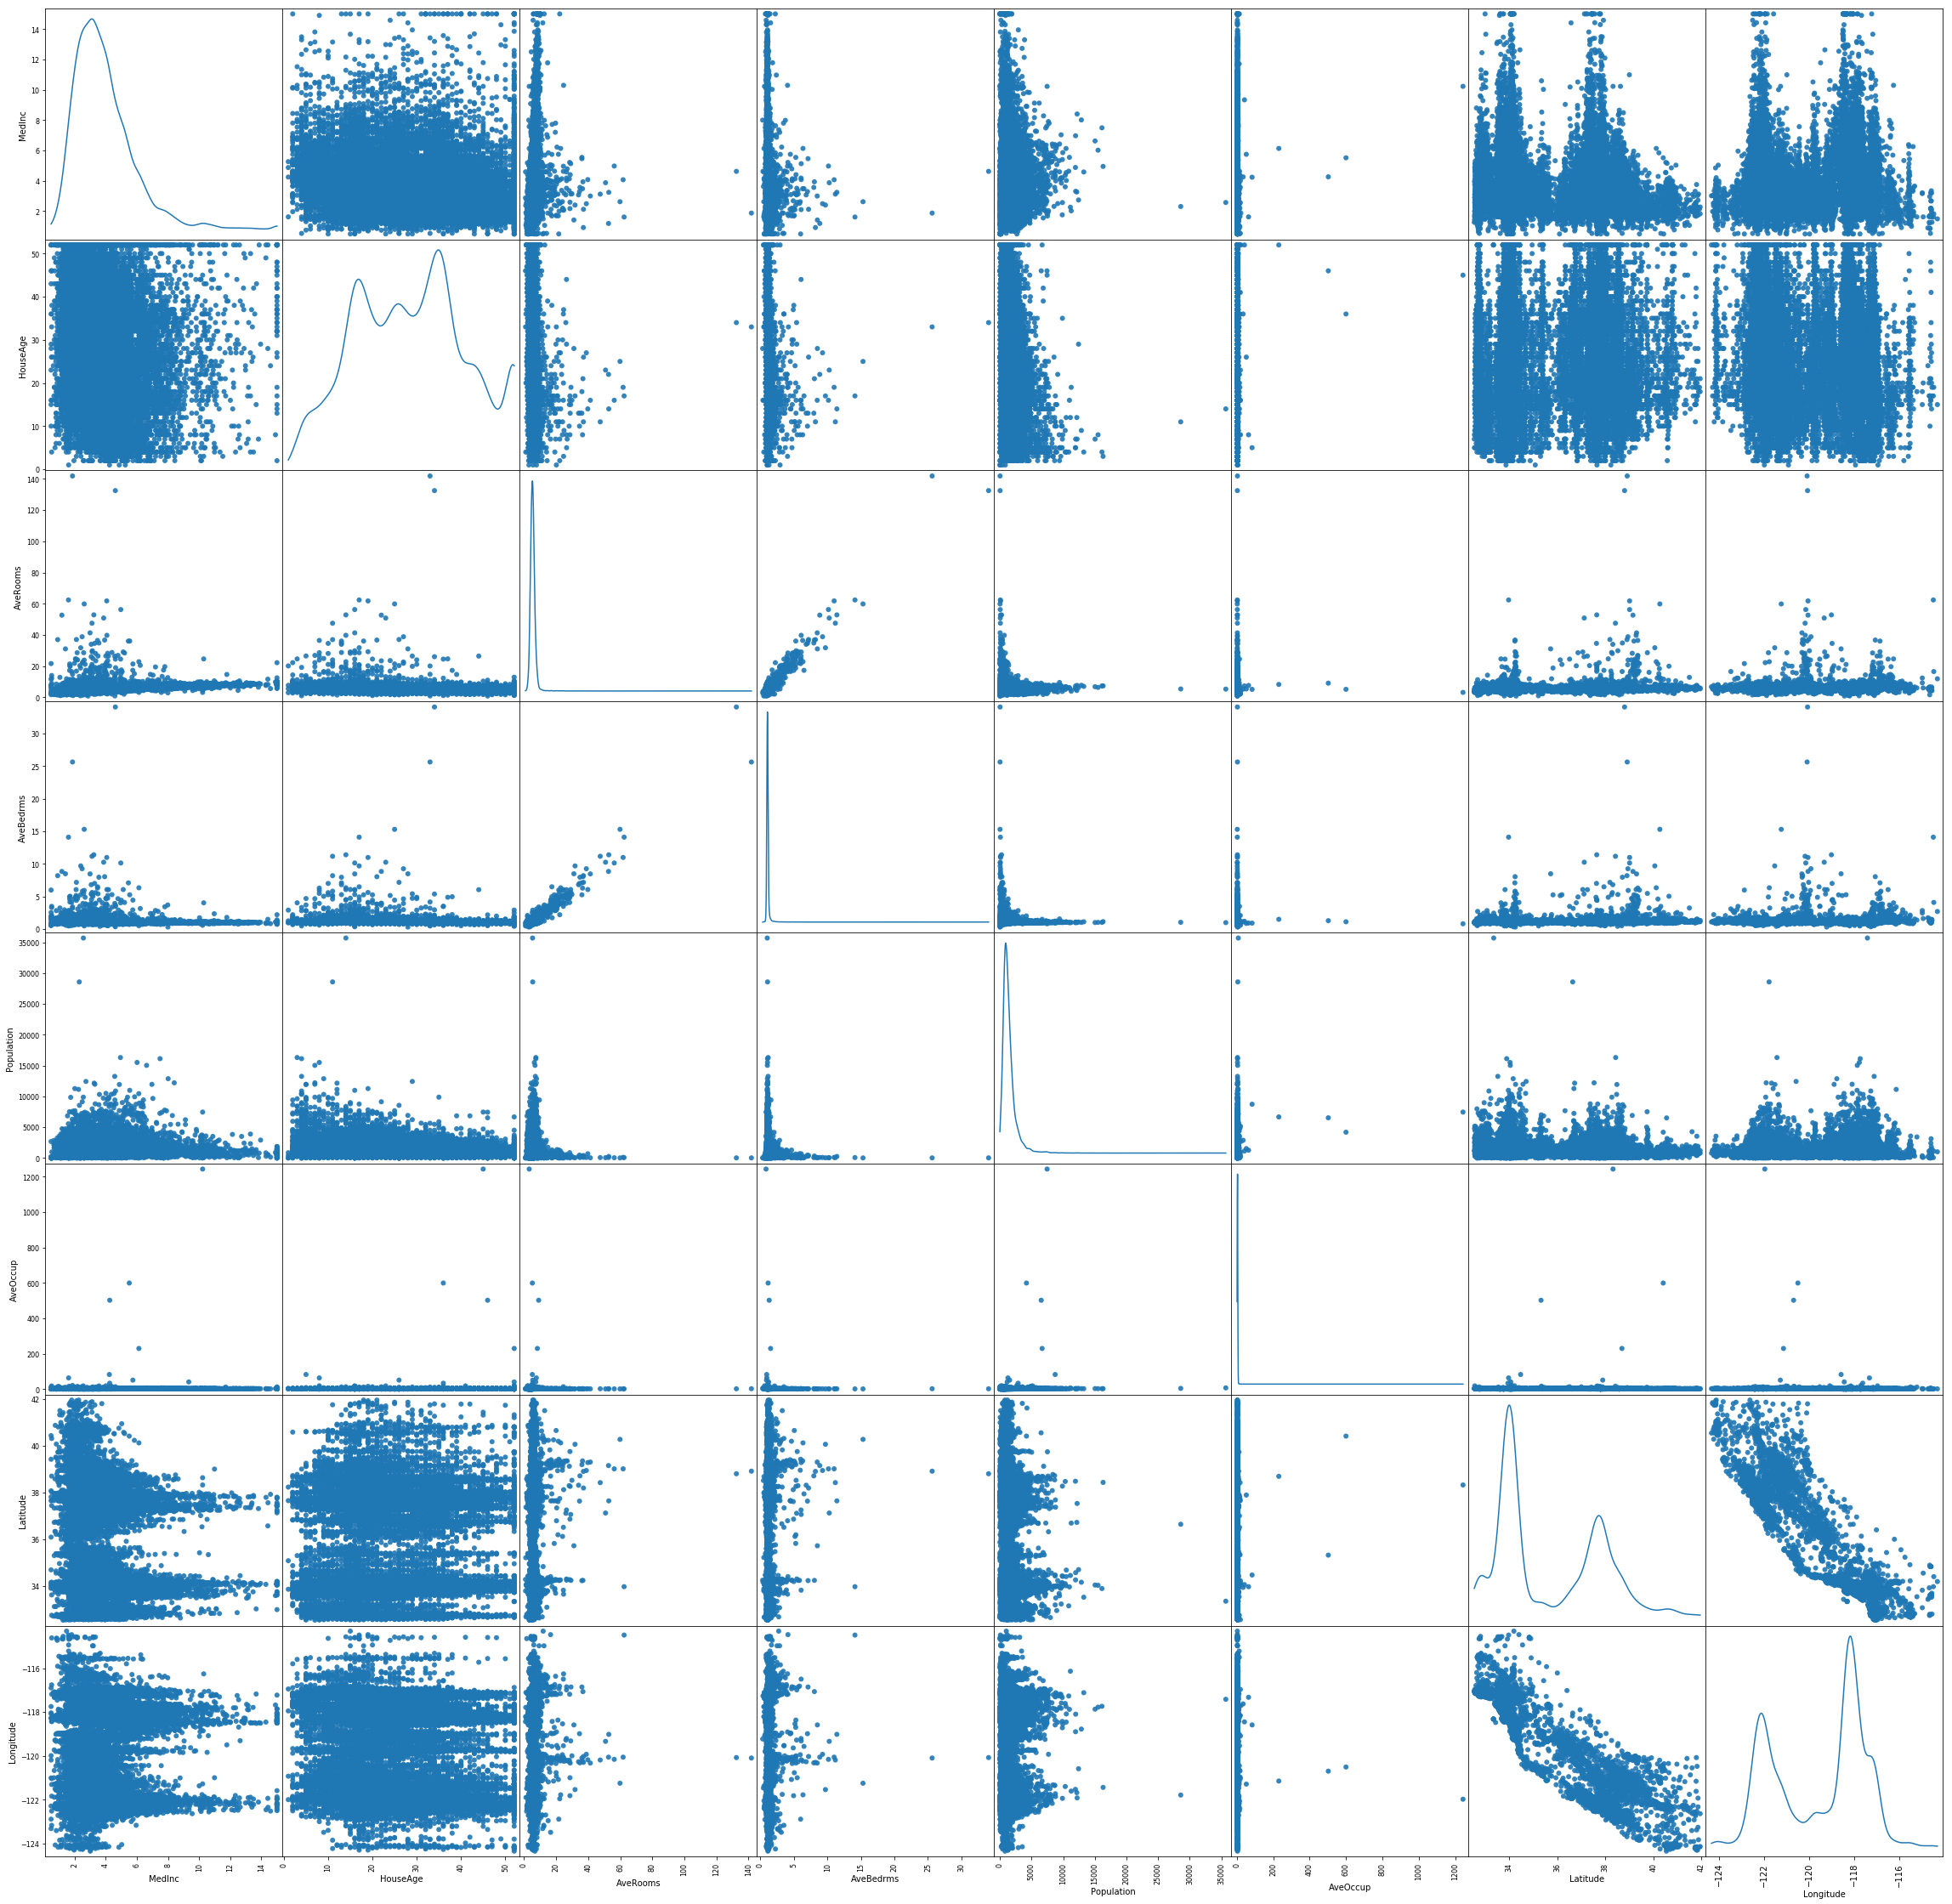

In [12]:
fig = plt.figure()
pd.plotting.scatter_matrix(X,figsize =(40,40),alpha=0.9,diagonal="kde",marker="o");
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
#plt.savefig("scatter_matrix.jpg", dpi = 700)

In [7]:
print("Training GradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor()
est.fit(X_train, y_train)
print("done in {:.2f}s".format(time() - tic))
print("Test R2 score: {:.2f}".format(est.score(X_test, y_test)))

Training GradientBoostingRegressor...
done in 2.94s
Test R2 score: 0.85


Computing partial dependence plots...
done in 4.294s


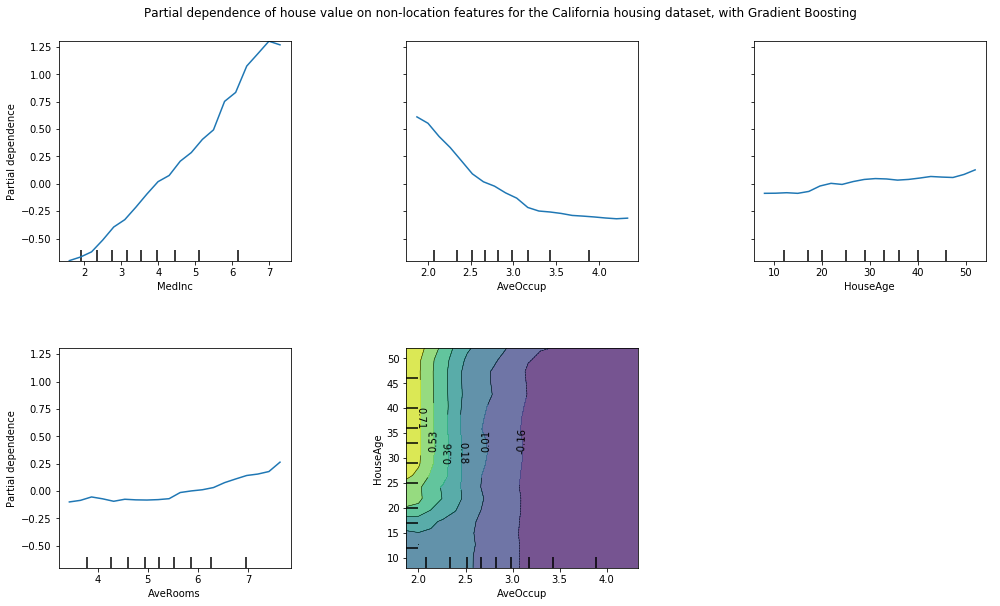

In [10]:
print('Computing partial dependence plots...')
tic = time()
features = ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms',
            ('AveOccup', 'HouseAge')]
plot_partial_dependence(est, X_train, features,
                        n_jobs=3, grid_resolution=20)
print("done in {:.3f}s".format(time() - tic))
fig = plt.gcf()
fig.set_size_inches(14, 9)
fig.suptitle('Partial dependence of house value on non-location features for the California housing dataset, with Gradient Boosting')
fig.subplots_adjust(wspace=0.5, hspace=0.4)
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
#fig.savefig("PDP.jpg", dpi = 900)

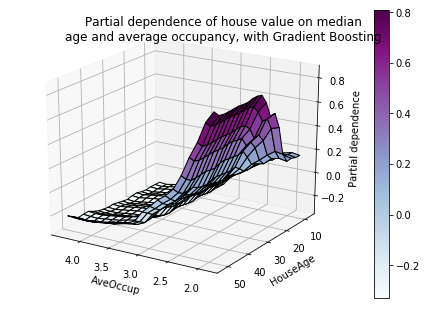

In [11]:
fig = plt.figure()

features = ('AveOccup', 'HouseAge')
pdp, axes = partial_dependence(est, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on median\n'
             'age and average occupancy, with Gradient Boosting')
plt.subplots_adjust(top=0.9)

plt.show()
#fig.savefig("2-d_PDP_surface.jpg", dpi = 900)

In [9]:
print(np.__version__)
print(pd.__version__)

1.15.4
0.23.4


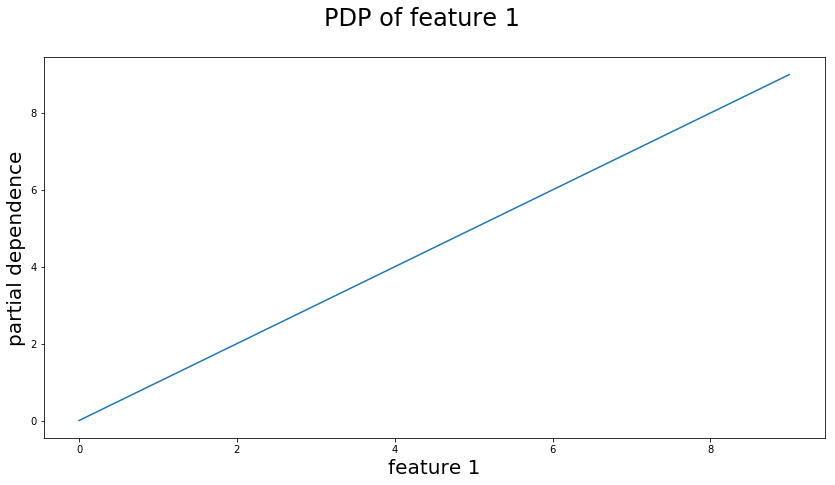

In [23]:
fig = plt.figure(figsize = (14,7))
plt.plot(range(0,10))
fig.suptitle('PDP of feature 1', fontsize=24)
plt.xlabel('feature 1', fontsize=20)
plt.ylabel('partial dependence', fontsize=20,rotation = 90)
fig.savefig("PDP of feature 1.jpg",dpi = 900)